## Observations and Insights 

In [108]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouseData = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
mouseData

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
nMice = mouseData["Mouse ID"].count()
nMice

1893

In [93]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRowsDF = mouseData[mouseData.duplicated(["Mouse ID","Timepoint"])]
duplicateRowsDF["Mouse ID"]

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [94]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateRowsDF


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
uniqueData = mouseData.drop_duplicates(["Mouse ID", "Timepoint"])
uniqueData

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [30]:
# Checking the number of mice in the clean DataFrame.
nUniqueMice = uniqueData["Mouse ID"].count()
nUniqueMice

1888

## Summary Statistics

In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumorVol = uniqueData[["Drug Regimen", "Tumor Volume (mm3)"]]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
regimenGroups = tumorVol.groupby("Drug Regimen")
regimenGroups

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729
...,...,...
1888,Naftisol,63.145652
1889,Naftisol,65.841013
1890,Naftisol,69.176246
1891,Naftisol,70.314904


In [84]:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
meanGroupby = regimenGroups.mean()
medianGroupby = regimenGroups.median()
varGroupby = regimenGroups.var()
stdevGroupby = regimenGroups.std()
semGroupby = regimenGroups.sem()

print("Mean =\n", meanGroupby,"\n")
print("Median =\n", medianGroupby,"\n")
print("Variance =\n", stdevGroupby,"\n")
print("Standard Deviation =\n", stdevGroupby,"\n")
print("SEM =\n", semGroupby)

Mean =
               Tumor Volume (mm3)
Drug Regimen                    
Capomulin              40.675741
Ceftamin               52.591172
Infubinol              52.884795
Ketapril               55.235638
Naftisol               54.331565
Placebo                54.033581
Propriva               52.393463
Ramicane               40.216745
Stelasyn               54.233149
Zoniferol              53.236507 

Median =
               Tumor Volume (mm3)
Drug Regimen                    
Capomulin              41.557809
Ceftamin               51.776157
Infubinol              51.820584
Ketapril               53.698743
Naftisol               52.509285
Placebo                52.288934
Propriva               50.909965
Ramicane               40.673236
Stelasyn               52.431737
Zoniferol              51.818479 

Variance =
               Tumor Volume (mm3)
Drug Regimen                    
Capomulin               4.994774
Ceftamin                6.268188
Infubinol               6.567243
Ketapril 

In [91]:
# Assemble the resulting series into a single summary dataframe.
groupbyStats = pd.merge(meanGroupby, medianGroupby, on="Drug Regimen")
groupbyStats = groupbyStats.rename(columns={"Tumor Volume (mm3)_x": "Mean", "Tumor Volume (mm3)_y": "Median"})
groupbyStats = pd.merge(groupbyStats, varGroupby, on="Drug Regimen")
groupbyStats = groupbyStats.rename(columns={"Tumor Volume (mm3)": "Variance"})
groupbyStats = pd.merge(groupbyStats, stdevGroupby, on="Drug Regimen")
groupbyStats = groupbyStats.rename(columns={"Tumor Volume (mm3)": "Standard Deviation"})
groupbyStats = pd.merge(groupbyStats, semGroupby, on="Drug Regimen")
groupbyStats = groupbyStats.rename(columns={"Tumor Volume (mm3)": "SEM"})

groupbyStats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [92]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumorVol.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [98]:
# Get a dataframe with the number of measurements for each drug regimen
nMeasurements = uniqueData.groupby("Drug Regimen").count()
nMeasurements = nMeasurements[["Mouse ID"]]
nMeasurements = nMeasurements.rename(columns={"Mouse ID": "Number of Measurements"})

nMeasurements

,Number of Measurements
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


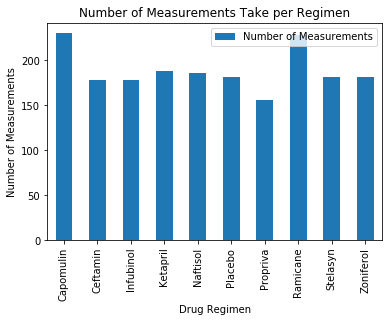

In [104]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
nMeasurements.plot(kind="bar")
plt.title("Number of Measurements Take per Regimen")
plt.ylabel("Number of Measurements")
plt.show()

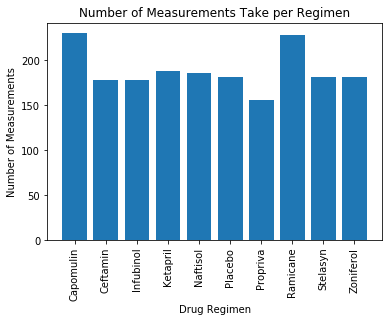

In [122]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
xAxis = np.arange(len(nMeasurements))
plt.bar(xAxis, nMeasurements["Number of Measurements"])
tickLoc = [value for value in xAxis]
plt.xticks(tickLoc, nMeasurements.index, rotation="vertical")
plt.title("Number of Measurements Take per Regimen")
plt.ylabel("Number of Measurements")
plt.xlabel("Drug Regimen")
plt.show()

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
